<a href="https://colab.research.google.com/github/shikhar23091999/hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Shikhar_Satpute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Question and Answers
# Which are the five most common countries of origin?
# Which are the months of highest and least occupation? 
# What is the most popular meal package? 
# Which is the most reserved room type?
# How many bookings changes have been done during the studied period?
# How many people have been registered in the hotel?
# What is the most common customer type?

In [18]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [19]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Reading the csv
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Project/Hotel Bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [21]:
# Copy the dataset
df_copy = df.copy()
df_copy.shape

(119390, 32)

In [22]:
# Finding the missing or null values
df_copy.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [23]:
# Replacing the agent and company value with 0
df_copy[['agent','company']]=df_copy[['agent','company']].fillna(0.0)

In [24]:
# Children should be rounded off
df_copy['children'].fillna(df_copy.children.mean(),inplace=True)

In [25]:
# Country should be replaced with mode
df_copy['country'].fillna(df_copy.mode().to_string(),inplace=True)

In [26]:
# Zero null values
df_copy.isnull().sum().sort_values(ascending = False)

reservation_status_date           0
reservation_status                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type               

In [27]:
# Removing the rows which has 0 guests
df_copy=df_copy.drop(df_copy[(df_copy['adults'] == 0) & (df_copy['babies'] == 0) & (df_copy['children'] == 0)].index)

In [28]:
df_copy.shape

(119210, 32)

In [29]:
# checking the datatype
df_copy.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [30]:
# converting the float to int
df_copy[['agent','company','children']] = df_copy[['agent','company','children']].astype('int64')

In [31]:
df_copy=df_copy.drop_duplicates()

In [32]:
df_copy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

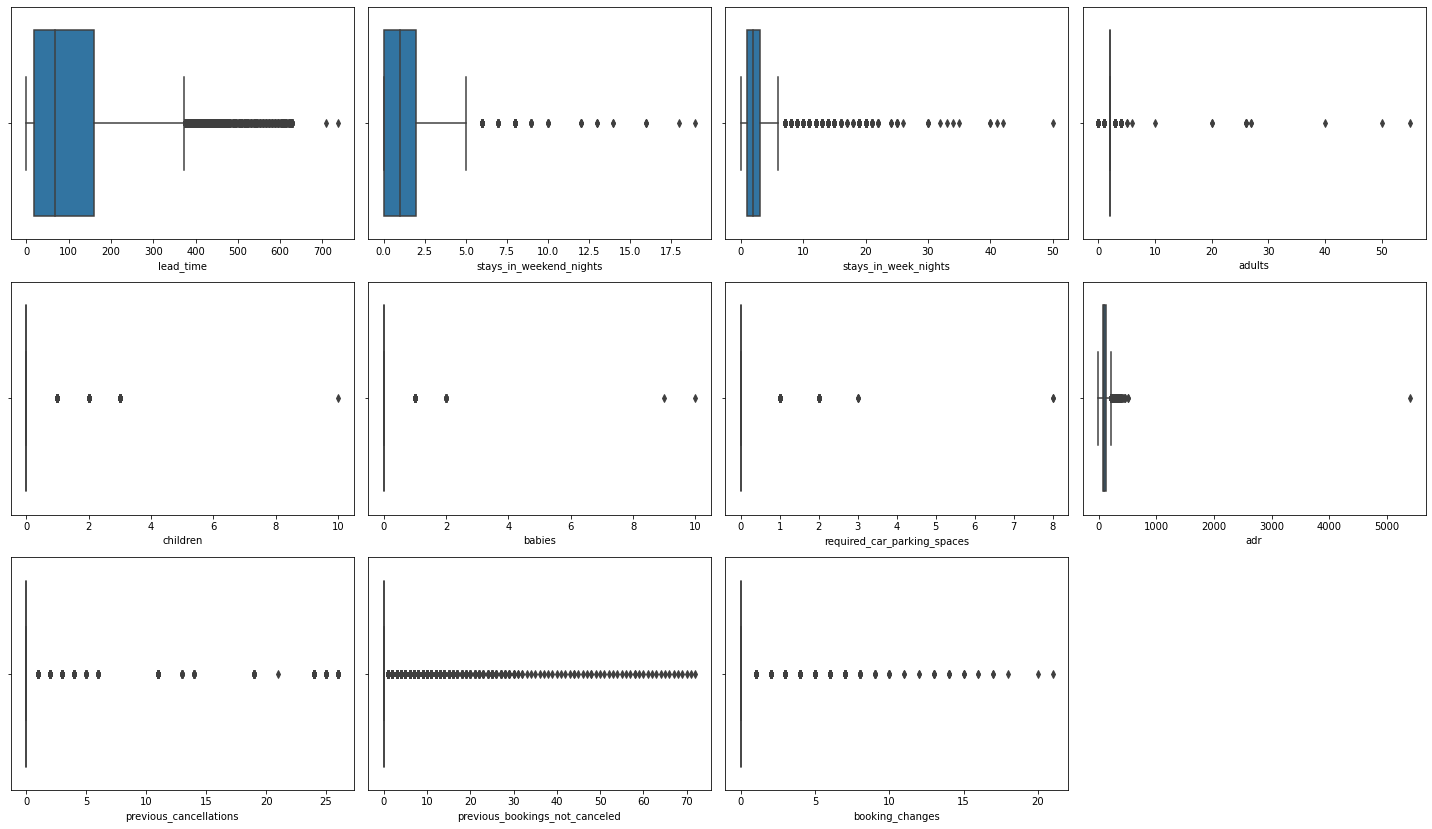

In [33]:
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(20,15))

for x in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[x])
  plt.tight_layout()

In [34]:
df_copy.loc[df_copy.lead_time > 500, 'lead_time'] = 500
df_copy.loc[df_copy.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df_copy.loc[df_copy.adults > 4, 'adults'] = 4
df_copy.loc[df_copy.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df_copy.loc[df_copy.previous_cancellations > 0, 'previous_cancellations'] = 1
df_copy.loc[df_copy.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df_copy.loc[df_copy.booking_changes > 5, 'booking_changes'] = 5
df_copy.loc[df_copy.babies > 8, 'babies'] = 0
df_copy.loc[df_copy.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df_copy.loc[df_copy.children > 8, 'children'] = 0
df_copy.loc[df_copy.adr > 1000, 'adr'] = 1000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'City hotel vs Resort hotel')

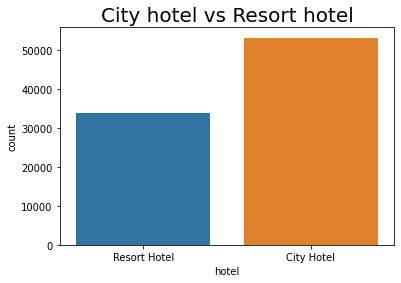

In [35]:
# City hotel vs Resort hotel booking count
sns.countplot(df_copy['hotel']).set_title("City hotel vs Resort hotel",fontsize = 20)

([<matplotlib.patches.Wedge at 0x7f2dbc629bd0>,
 [Text(-1.0341113192017586, -0.37498503903329095, 'City Hotel'),
  Text(1.1281214774295134, 0.4090744824139636, 'Resort Hotel')],
 [Text(-0.5640607195645955, -0.20453729401815868, '61.1%'),
  Text(0.6580708618338827, 0.23862678140814542, '38.9%')])

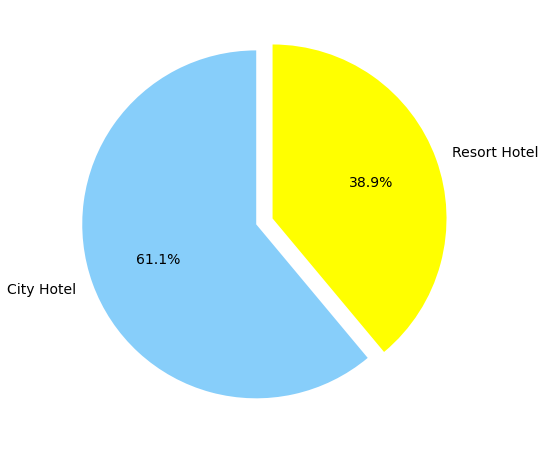

In [36]:
# City hotel vs Resort hotel booking percentage
plt.rcParams['figure.figsize'] = 8,8
labels = df_copy['hotel'].value_counts().index
sizes = df_copy['hotel'].value_counts()
explode = (0, 0.1)
colors = ['lightskyblue','yellow']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

Text(0.5, 1.0, 'Yearly Comparison')

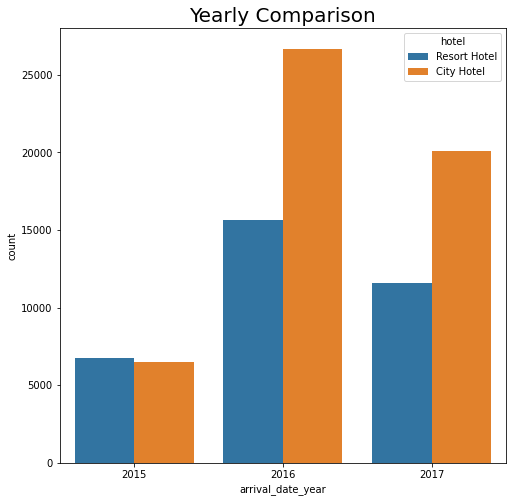

In [37]:
# Yearly comparison of booking 
sns.countplot(data = df_copy, x = 'arrival_date_year', hue = 'hotel').set_title("Yearly Comparison", fontsize = 20)

Text(0.5, 1.0, 'Monthly Comparison')

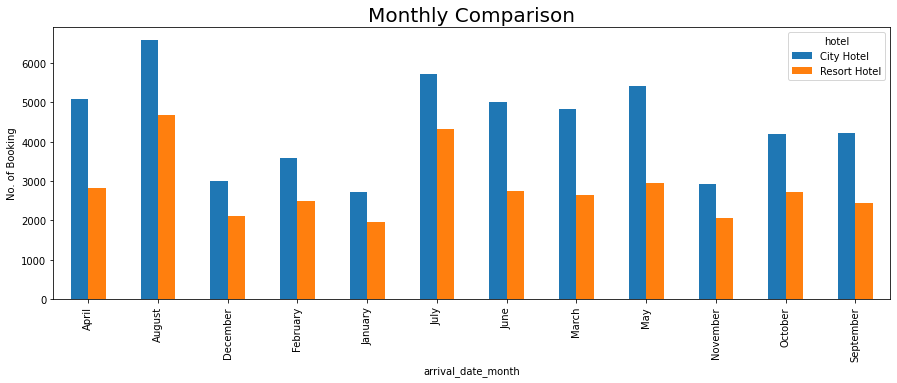

In [38]:
# Montly comparison of booking
ax1= df_copy.groupby(['arrival_date_month','hotel']).size()
ax1 = ax1.unstack()
ax1 = ax1.plot.bar(figsize=(15,5))
ax1.set_ylabel('No. of Booking')
ax1.set_title("Monthly Comparison",fontsize=20)

Text(0.5, 1.0, 'Date-Wise Comparison')

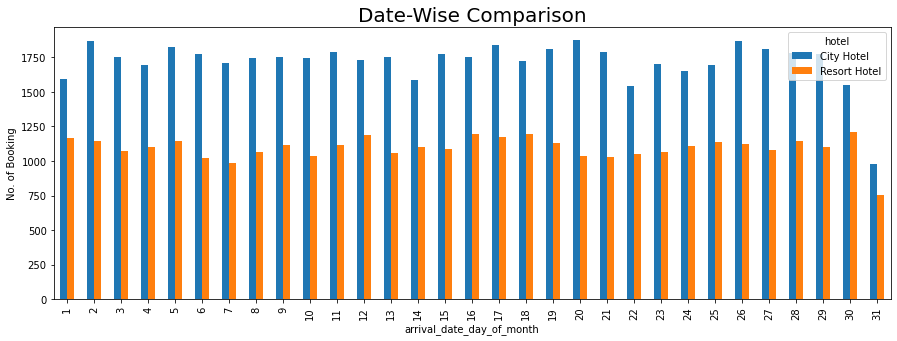

In [39]:
# Date wise comparison
ax2= df_copy.groupby(['arrival_date_day_of_month','hotel']).size()
ax2 = ax2.unstack()
ax2 = ax2.plot.bar(figsize=(15,5))
ax2.set_ylabel('No. of Booking')
ax2.set_title("Date-Wise Comparison",fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Resevered Room (Booking)')

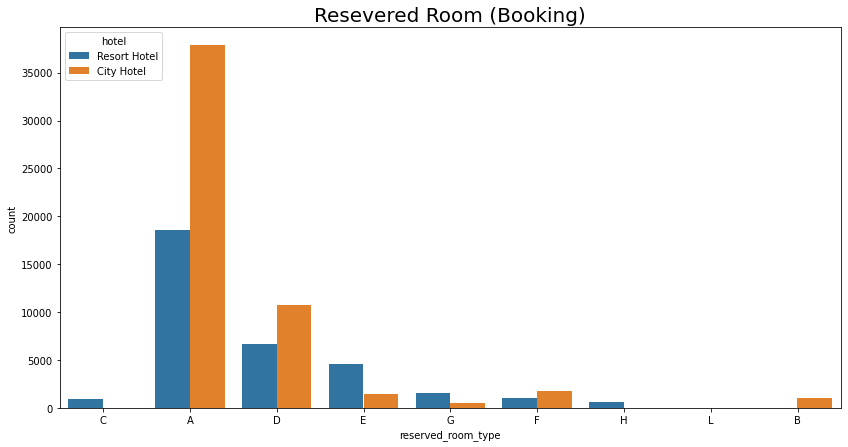

In [40]:
# Resevered Rooms while booking
plt.figure(figsize=(14,7))
sns.countplot(df_copy['reserved_room_type'],hue=df_copy.hotel).set_title("Resevered Room (Booking)", fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Assigned Room (Check-in)')

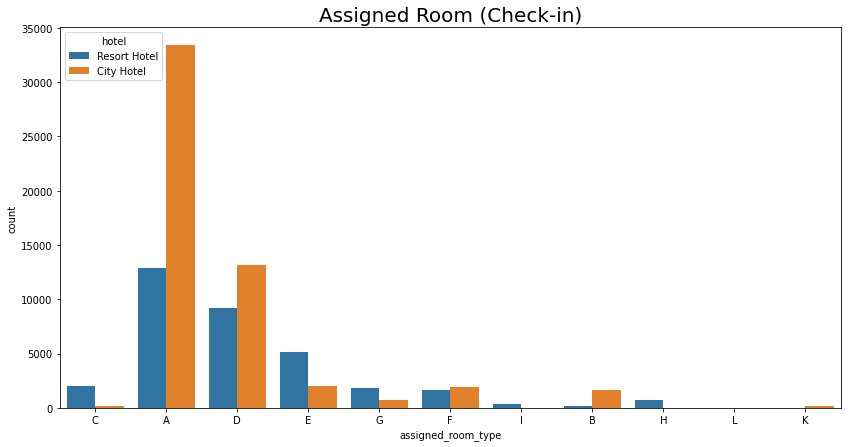

In [41]:
# Rooms assigned during the checkin
plt.figure(figsize=(14,7))
sns.countplot(df_copy['assigned_room_type'],hue=df_copy.hotel).set_title("Assigned Room (Check-in)", fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, "Change's in the booking")

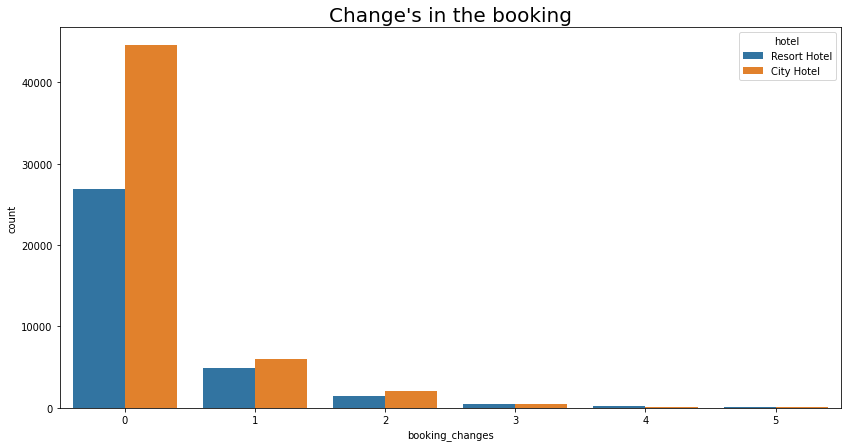

In [42]:
# Booking changes 
plt.figure(figsize=(14,7))
sns.countplot(df_copy['booking_changes'],hue=df_copy.hotel).set_title("Change's in the booking", fontsize = 20)

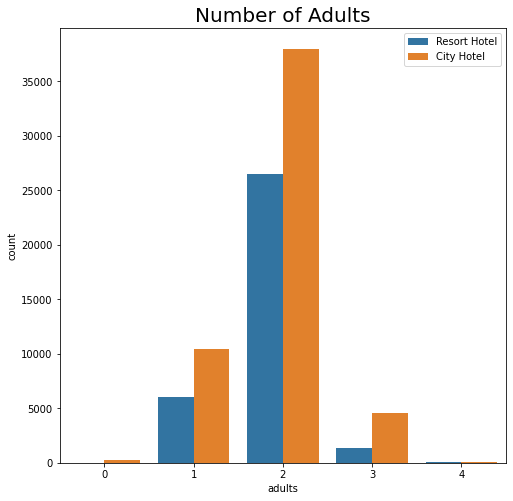

In [43]:
# No. of adults
sns.countplot(data = df_copy, x = 'adults', hue = 'hotel').set_title("Number of Adults", fontsize = 20)
plt.legend(loc='upper right')

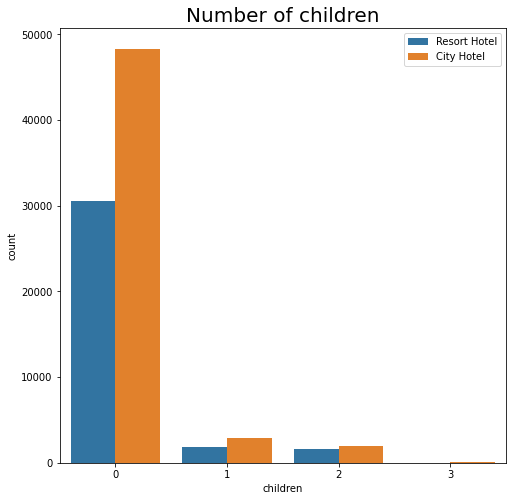

In [44]:
sns.countplot(data = df_copy, x = 'children', hue = 'hotel').set_title("Number of children", fontsize = 20)
plt.legend(loc='upper right')

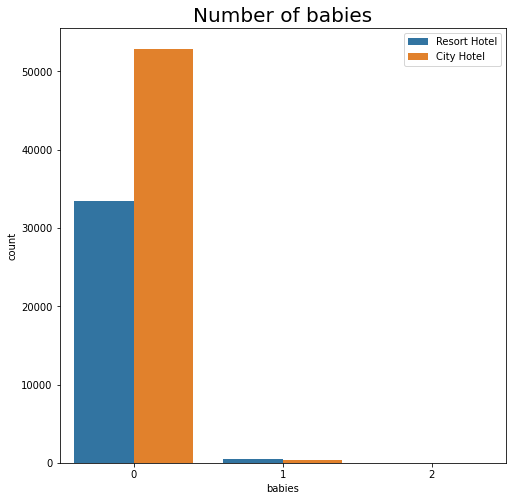

In [45]:
sns.countplot(data = df_copy, x = 'babies', hue = 'hotel').set_title("Number of babies", fontsize = 20)
plt.legend(loc='upper right')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total Members')

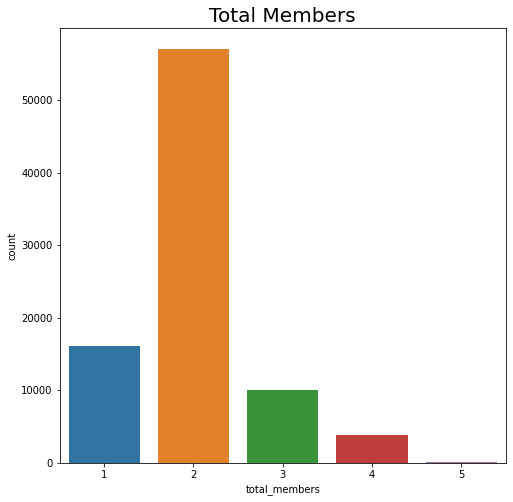

In [46]:
df_copy['total_members'] = df_copy.adults + df_copy.babies + df_copy.children
sns.countplot(df_copy.total_members).set_title('Total Members',fontsize=20)